Import necessary libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

Set style for plots

In [123]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Load the dataset

In [124]:
df = pd.read_csv('train.csv')

Basic data exploration

In [125]:
print("=== Dataset Overview ===")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\n=== Data Types ===")
print(df.info())
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Overview ===
Shape of dataset: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

Data Cleaning
Fill missing age values with median

In [126]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_9652\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


 Fill missing embarked with mode

In [127]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_9652\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Cabin has too many missing values, we'll drop it

In [128]:
df.drop('Cabin', axis=1, inplace=True)

Survival Analysis

In [129]:
print("\n=== Survival Rate ===")
print(f"Overall survival rate: {df['Survived'].mean():.2%}")
print("\nSurvival by gender:")
print(df.groupby('Sex')['Survived'].mean())
print("\nSurvival by passenger class:")
print(df.groupby('Pclass')['Survived'].mean())


=== Survival Rate ===
Overall survival rate: 38.38%

Survival by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Visualization 1: Survival by Gender and Class

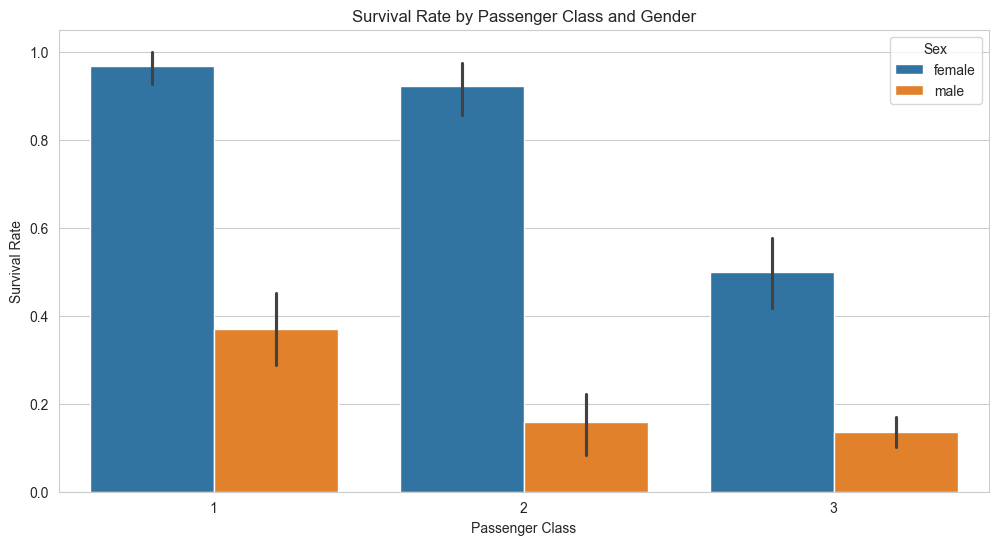

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


Visualization 2: Age Distribution by Survival

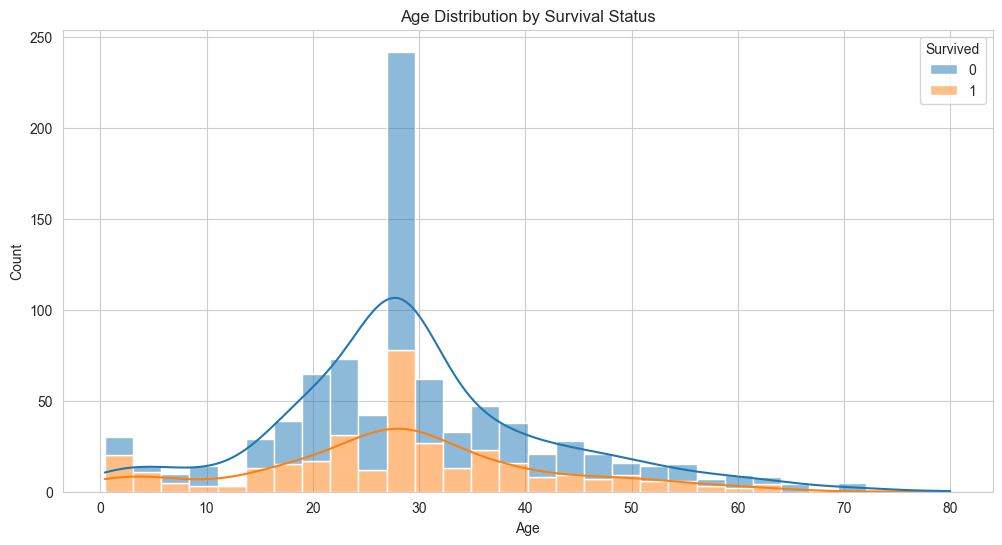

In [131]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Visualization 3: Fare Distribution by Passenger Class

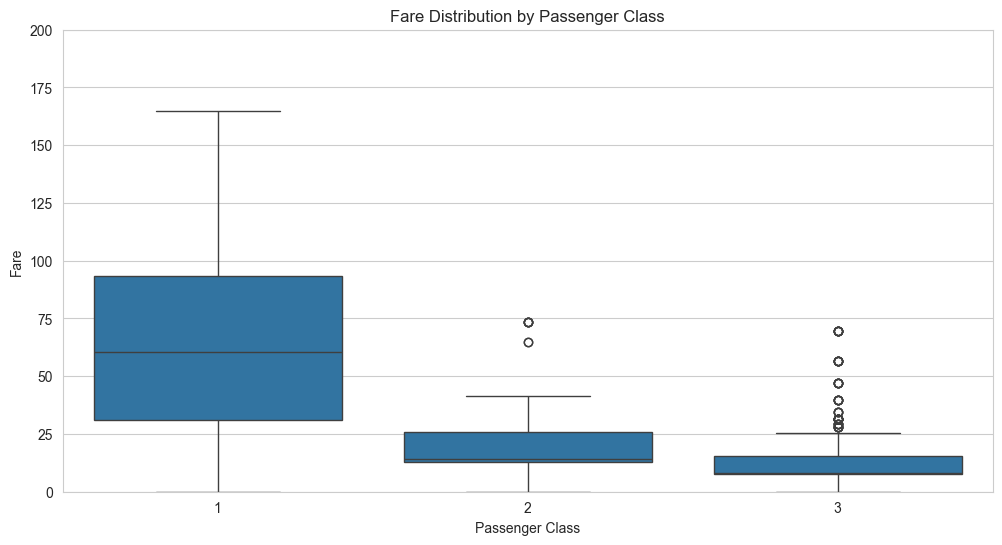

In [132]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 200)  # Limit y-axis to better visualize most fares
plt.show()

Visualization 4: Family Size Analysis

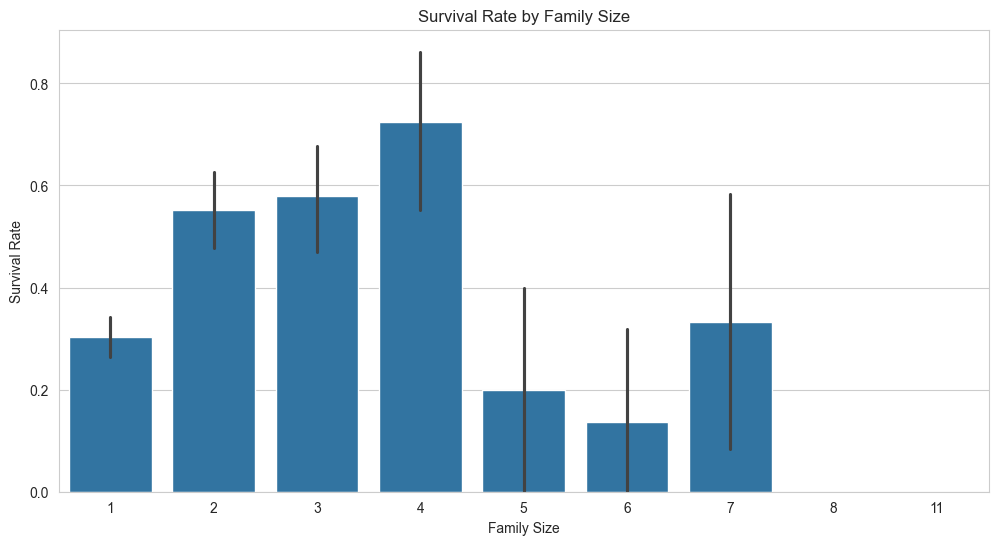

In [133]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

Visualization 5: Pairplot of Numerical Variables

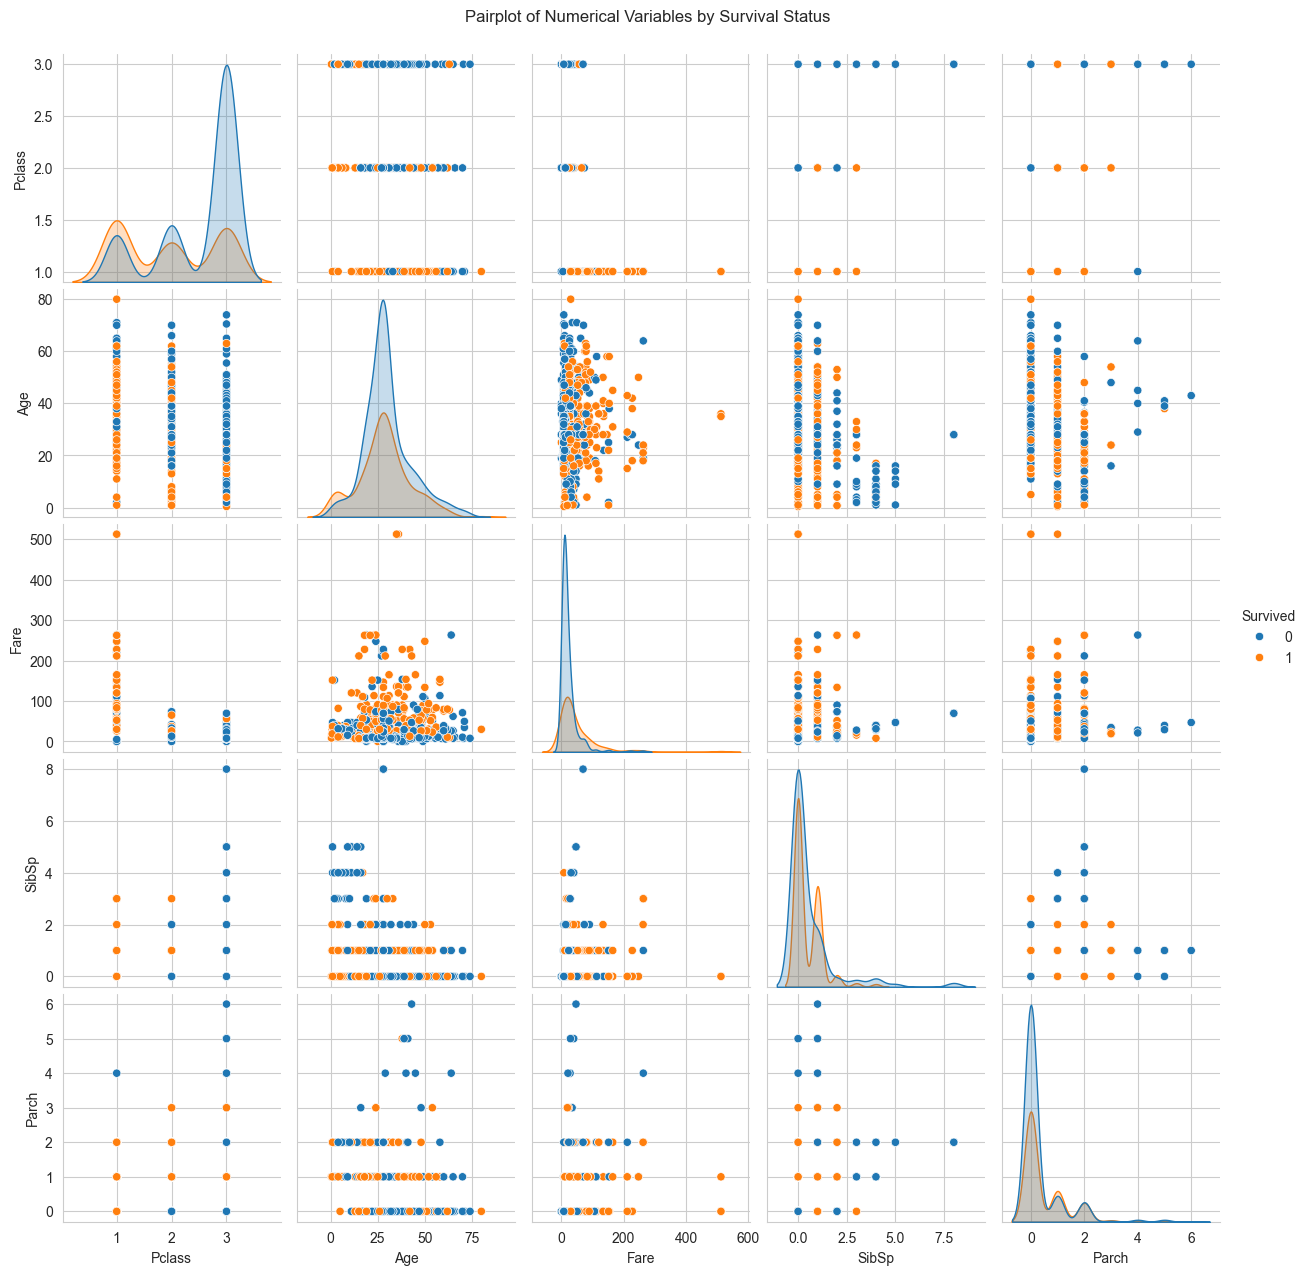

In [134]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle('Pairplot of Numerical Variables by Survival Status', y=1.02)
plt.show()

Visualization 6: Correlation Heatmap

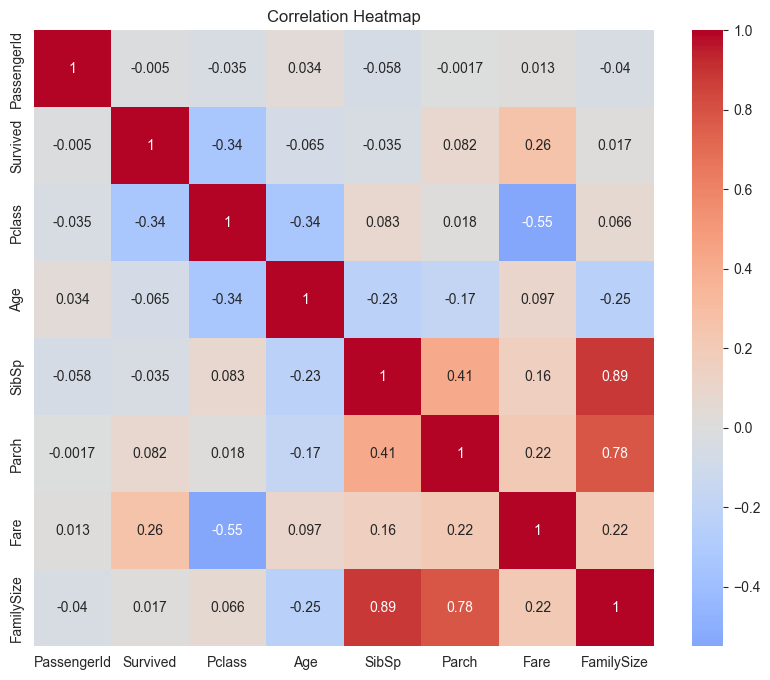

In [135]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Visualization 7: Embarkation Port Analysis

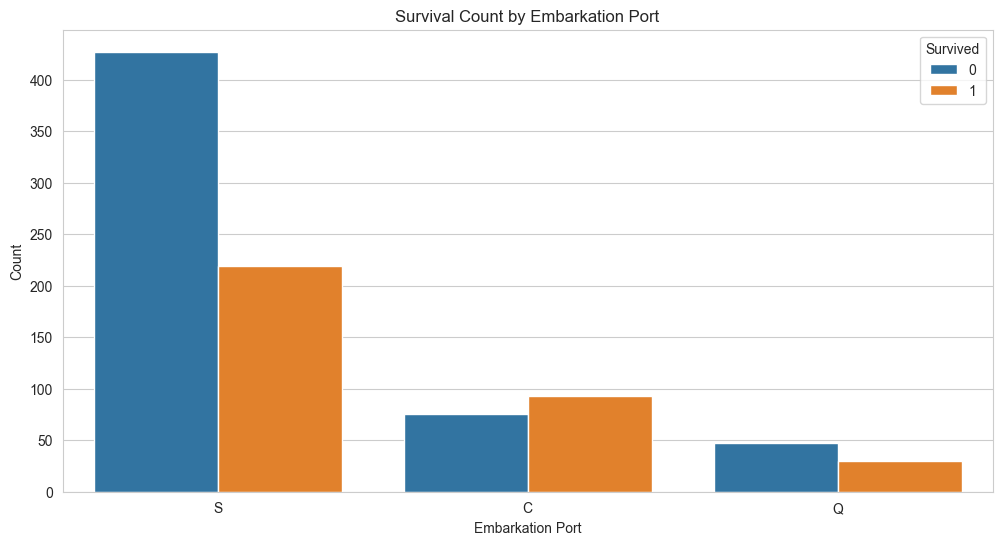

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

Visualization 8: Age Distribution by Class and Survival

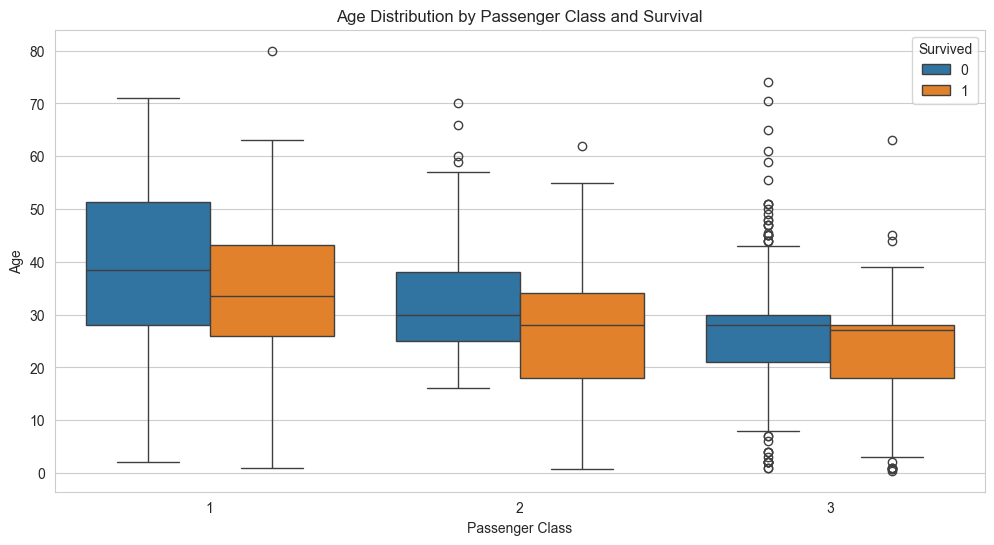

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

Visualization 9: Fare vs Age with Survival

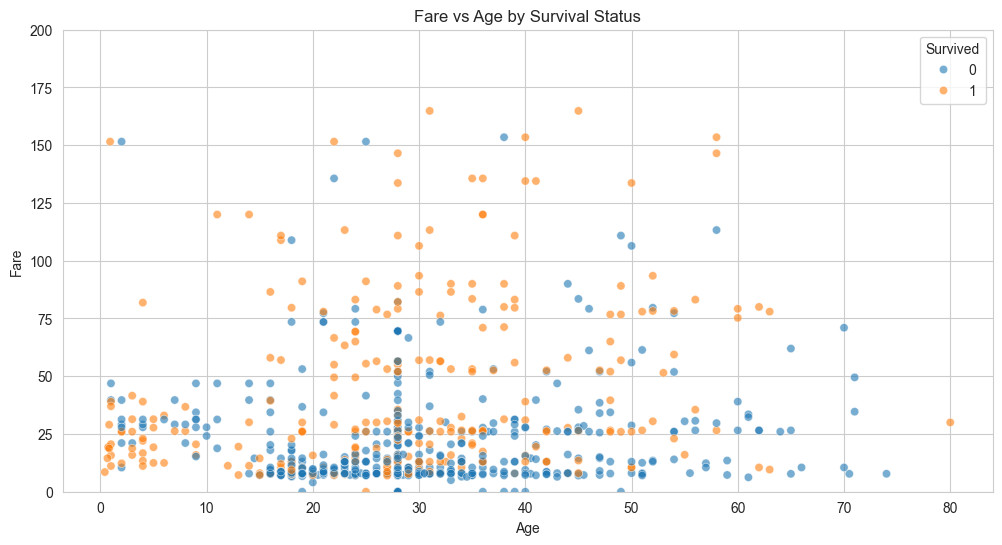

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
plt.title('Fare vs Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim(0, 200)
plt.show()

Visualization 10: Title Extraction and Analysis

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Alpha\AppData\Local\Temp\ipykernel_9652\1680101699.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


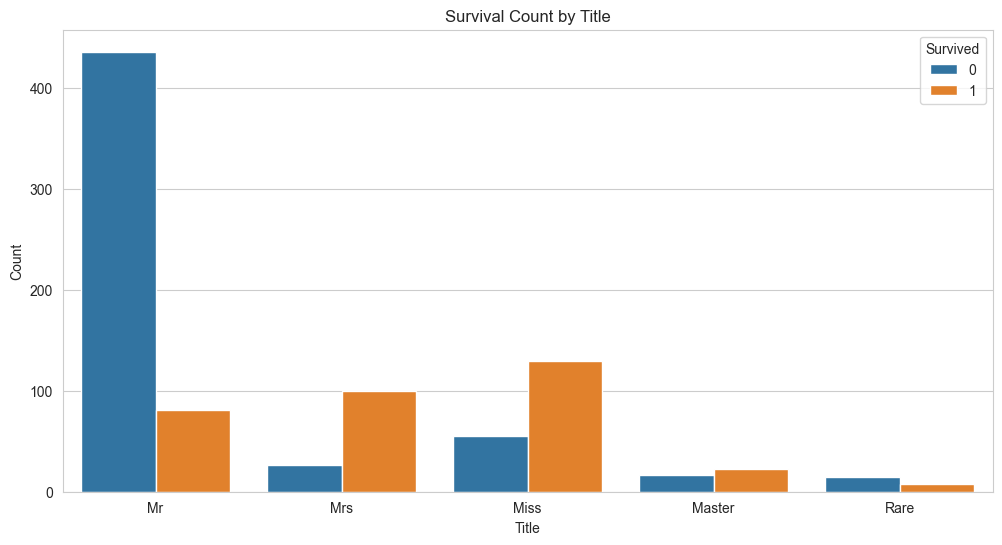

In [139]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()
